Importando las bibliotecas necesarias

In [87]:
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt

Creando el data frame con los datos

In [88]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Observando las correlaciones entre las **variables independientes**

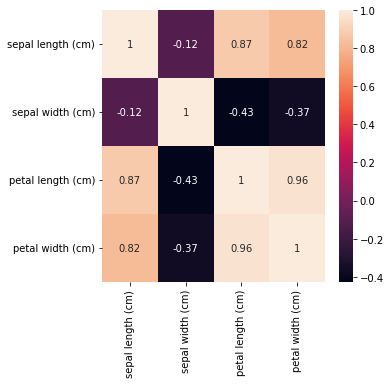

In [89]:
fig = plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

Escalando los datos

In [90]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(df)
X_scaled = sc.transform(df)

df_scaled = pd.DataFrame(X_scaled, columns=iris.feature_names)
df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


Aplicando PCA a todos los componentes para verificar que tan bien captura la varianza de los datos

[ 72.96244541  95.8132072   99.48212909 100.        ]


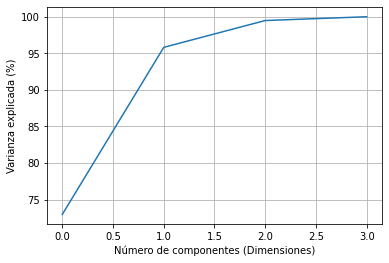

In [91]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(n_components=None)
pca.fit(df_scaled)

#Mostrando la suma acumulada del ratio de la varianza explicada
print(np.cumsum(pca.explained_variance_ratio_*100))

#Creando un plot para mostrar la el impacto de la cantidad de componentes
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel("Número de componentes (Dimensiones)")
plt.ylabel("Varianza explicada (%)")
plt.grid()
plt.show()

Se puede apreciar que con dos componentes principales, se captura el 95.81% de los datos. Por lo tanto, se seleccionará n_components=2 para realizar el PCA

**Corrriendo PCA de nuevo, pero con 2 componentes**

In [92]:
pca = PCA(n_components=2)
pca.fit(df_scaled)
X_pca = pca.transform(df_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca.head()

,PCA1,PCA2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


### Vamos a transformar un solo registro

En el procedimiento anterior se trabajo con todo el dataframe. Esta vez, se va a trabajar solo con un registro.

In [93]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [104]:
#Se selecciona el primer registro del dataframe original
registro = df.iloc[0].values
registro

array([5.1, 3.5, 1.4, 0.2])

In [105]:
#Se realiza el escalado de ese registro
registro_escalado = sc.transform(np.array([registro]))
print(registro_escalado)

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]]


C:\Users\diego\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Se puede observar que el resultado es igual al primero registro del dataframe **df_scaled**

In [106]:
df_scaled.iloc[0]

sepal length (cm)   -0.900681
sepal width (cm)     1.019004
petal length (cm)   -1.340227
petal width (cm)    -1.315444
Name: 0, dtype: float64

Por úlitmo, vamos a transformar ese registro utilizando el PCA anteriormente entrenado

In [107]:
registro_pca = pca.transform(registro_escalado)
registro_pca

C:\Users\diego\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([[-2.26470281,  0.4800266 ]])

Se puede observar que el resultado es igual al primer registro del dataframe **df_pca**

In [108]:
df_pca.iloc[0]

PCA1   -2.264703
PCA2    0.480027
Name: 0, dtype: float64